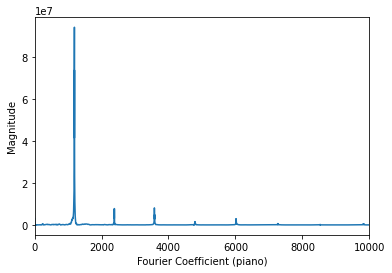

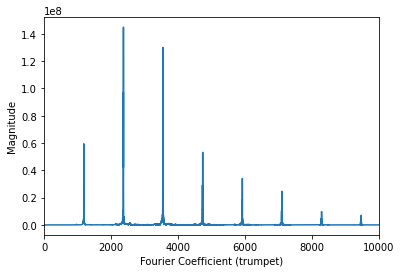

In [50]:
# Exercise 7.3

import urllib3
from numpy import arange,array,append,argmax
from numpy.fft import rfft
from matplotlib.pyplot import plot,show,xlim,xlabel,ylabel

pianourl="http://www-personal.umich.edu/~mejn/cp/data/piano.txt"
trumpeturl="http://www-personal.umich.edu/~mejn/cp/data/trumpet.txt"

http = urllib3.PoolManager()

response = http.request('GET', pianourl)
pianodata = response.data.decode('utf-8')

response = http.request('GET', trumpeturl)
trumpetdata = response.data.decode('utf-8')

string=""
piano=array([],int)
trumpet=array([],int)


for i in range(len(pianodata)):
  if (pianodata[i] == "\n"):
    if (string != ""): piano = append(piano,int(string))
    string=""
  else:
    string = string + pianodata[i]


for i in range(len(trumpetdata)):
  if (trumpetdata[i] == "\n"):
    if (string != ""): trumpet = append(trumpet,int(string))
    string=""
  else:
    string = string + trumpetdata[i]

c_piano = rfft(piano)
c_trumpet = rfft(trumpet)

plot(abs(c_piano))
xlabel("Fourier Coefficient (piano)")
ylabel("Magnitude")
xlim(0,10000)
show()

plot(abs(c_trumpet))
xlabel("Fourier Coefficient (trumpet)")
ylabel("Magnitude")
xlim(0,10000)
show()


In [53]:
# 7.3 continued
# Interesting that the piano is mostly a single fundamental frequency but the trumpet has the fundamental frequency not as the strongest. This is what gives the trumpet is "trebly" sound!

# Now we find the position of the first peak, from above check only the first 2000 coefficients or else we will pick up the second peak
piano_fundamental = argmax(abs(c_piano)[0:2000])
trumpet_fundamental = argmax(abs(c_trumpet)[0:2000])

print("Max first fundamental piano peak = ",piano_fundamental,"and total number = ",len(piano))
print("Max first fundamental trumpet peak = ",trumpet_fundamental,"and total number = ",len(trumpet))

## Term in the series is e^{i*2*pi*k*n/N} where N is the number of samples
## Frequency of each term is nu*k/N

sampling = 44100

print("Piano frequency = ",piano_fundamental*sampling/len(piano),"Hz")
print("Trumpet frequency = ",trumpet_fundamental*sampling/len(trumpet),"Hz")

### Looks like it's twice a middle C, so they are playing an octave above middle C!

Max first fundamental piano peak =  1190 and total number =  100000
Max first fundamental trumpet peak =  1183 and total number =  100000
Piano frequency =  524.79 Hz
Trumpet frequency =  521.703 Hz


Read in 1024 rows of data


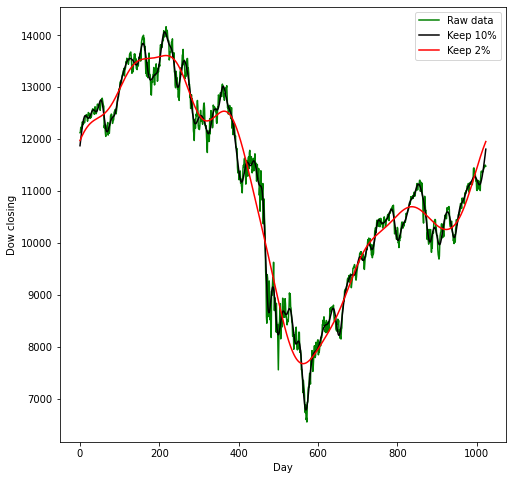

In [63]:
# 7.4
import urllib3
from numpy import arange,array,append,argmax
from numpy.fft import rfft,irfft
from matplotlib.pyplot import plot,show,xlim,xlabel,ylabel,figure,legend

url="http://www-personal.umich.edu/~mejn/cp/data/dow.txt"

http = urllib3.PoolManager()

response = http.request('GET', url)
data = response.data.decode('utf-8')


string=""
values=array([],float)

for i in range(len(data)):
  if (data[i] == "\n"):
    if (string != ""): values = append(values,float(string))
    string=""
  else:
    string = string + data[i]

print("Read in",len(values),"rows of data")

figure(figsize=[8,8])
plot(values,'g',label="Raw data")
xlabel("Day")
ylabel("Dow closing")

# Now calculate Fourier transform
c = rfft(values)
cutoff1 = 0.1
cutoff2 = 0.02

# now do the inverse and apply cutoffs. This allows us to discard the small-level detail. 
# the cut-off scale determines how much the curve is smoothed out
n = int(cutoff1*len(c)) # how many to cut off?
c[n:] = 0.0
z = irfft(c)
plot(z,"k-",label="Keep 10%")

n = int(cutoff2*len(c)) #how many to keep
c[n:] = 0.0
z = irfft(c)
plot(z,"r-",label="Keep 2%")
legend()
show()

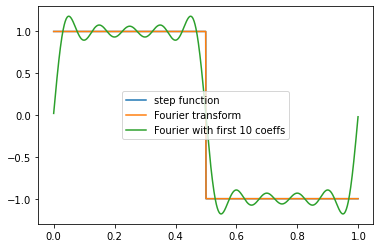

In [68]:
# 7.5

from numpy import arange,empty
from numpy.fft import rfft,irfft
from matplotlib.pyplot import plot,show,xlim,xlabel,ylabel,figure,legend

def f(x):
  if x<0.5:
    return 1
  else:
    return -1

N = 1000
x = arange(0,1,1./N)
y = empty([N],float)
for i in range(N):
  y[i] = f(x[i])

plot(x,y,label="step function")

c = rfft(y)
z = irfft(c)
plot(x,z,label="Fourier transform")

c[10:] = 0.0
z = irfft(c)
plot(x,z,label="Fourier with first 10 coeffs") ## produces artifacts, aka we lose information
legend()
show()

Read in 1024 rows of data


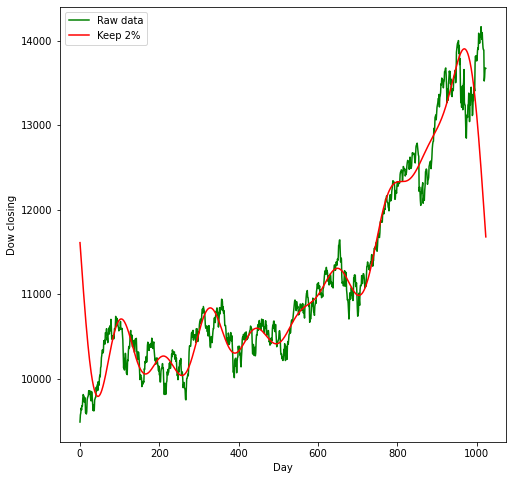

In [69]:
# 7.6 using same method as above, leads to large artifacts at beginning and end of data

import urllib3
from numpy import arange,array,append,argmax
from numpy.fft import rfft,irfft
from matplotlib.pyplot import plot,show,xlim,xlabel,ylabel,figure,legend

url="http://www-personal.umich.edu/~mejn/cp/data/dow2.txt"

http = urllib3.PoolManager()

response = http.request('GET', url)
data = response.data.decode('utf-8')


string=""
values=array([],float)

for i in range(len(data)):
  if (data[i] == "\n"):
    if (string != ""): values = append(values,float(string))
    string=""
  else:
    string = string + data[i]

print("Read in",len(values),"rows of data")

figure(figsize=[8,8])
plot(values,'g',label="Raw data")
xlabel("Day")
ylabel("Dow closing")

# Now calculate Fourier transform
c = rfft(values)
cutoff2 = 0.02

# now do the inverse and apply cutoffs. This allows us to discard the small-level detail. 
# the cut-off scale determines how much the curve is smoothed out

n = int(cutoff2*len(c)) #how many to keep
c[n:] = 0.0
z = irfft(c)
plot(z,"r-",label="Keep 2%")
legend()
show()

In [70]:
# Copy over dcst.py from the textbook
######################################################################
#
# Functions to perform fast discrete cosine and sine transforms and
# their inverses in one and two dimensions.  These functions work by
# wrapping the DFT function from numpy, rather than explicitly
# performing the cosine and sine transforms themselves.  The sine
# transforms take arrays whose first element is zero and return arrays
# whose first element is also zero.  This differs from some other
# implementations, which drop the first element, since it is always
# zero.
#
#   dct(y): Type-II discrete cosine transform (DCT) of real data y
#   idct(a): Type-II inverse DCT of a
#   dct2(y): 2D DCT of 2D real array y
#   idct2(a): 2D inverse DCT real array a
#   dst(y): Type-I discrete sine transform (DST) of real data y
#   idst(a): Type-I inverse DST of a
#   dst2(y): 2D DST of 2D real array y
#   idst2(a): 2D inverse DST real array a
#
# Written by Mark Newman <mejn@umich.edu>, June 24, 2011
# You may use, share, or modify this file freely
#
######################################################################


from numpy import empty,arange,exp,real,imag,pi
from numpy.fft import rfft,irfft


######################################################################
# 1D DCT Type-II

def dct(y):
    N = len(y)
    y2 = empty(2*N,float)
    y2[:N] = y[:]
    y2[N:] = y[::-1]

    c = rfft(y2)
    phi = exp(-1j*pi*arange(N)/(2*N))
    return real(phi*c[:N])


######################################################################
# 1D inverse DCT Type-II

def idct(a):
    N = len(a)
    c = empty(N+1,complex)

    phi = exp(1j*pi*arange(N)/(2*N))
    c[:N] = phi*a
    c[N] = 0.0
    return irfft(c)[:N]


######################################################################
# 2D DCT

def dct2(y):
    M = y.shape[0]
    N = y.shape[1]
    a = empty([M,N],float)
    b = empty([M,N],float)

    for i in range(M):
        a[i,:] = dct(y[i,:])
    for j in range(N):
        b[:,j] = dct(a[:,j])

    return b


######################################################################
# 2D inverse DCT

def idct2(b):
    M = b.shape[0]
    N = b.shape[1]
    a = empty([M,N],float)
    y = empty([M,N],float)

    for i in range(M):
        a[i,:] = idct(b[i,:])
    for j in range(N):
        y[:,j] = idct(a[:,j])

    return y


######################################################################
# 1D DST Type-I

def dst(y):
    N = len(y)
    y2 = empty(2*N,float)
    y2[0] = y2[N] = 0.0
    y2[1:N] = y[1:]
    y2[:N:-1] = -y[1:]
    a = -imag(rfft(y2))[:N]
    a[0] = 0.0

    return a


######################################################################
# 1D inverse DST Type-I

def idst(a):
    N = len(a)
    c = empty(N+1,complex)
    c[0] = c[N] = 0.0
    c[1:N] = -1j*a[1:]
    y = irfft(c)[:N]
    y[0] = 0.0

    return y


######################################################################
# 2D DST

def dst2(y):
    M = y.shape[0]
    N = y.shape[1]
    a = empty([M,N],float)
    b = empty([M,N],float)

    for i in range(M):
        a[i,:] = dst(y[i,:])
    for j in range(N):
        b[:,j] = dst(a[:,j])

    return b


######################################################################
# 2D inverse DST

def idst2(b):
    M = b.shape[0]
    N = b.shape[1]
    a = empty([M,N],float)
    y = empty([M,N],float)

    for i in range(M):
        a[i,:] = idst(b[i,:])
    for j in range(N):
        y[:,j] = idst(a[:,j])

    return y

Read in 1024 rows of data


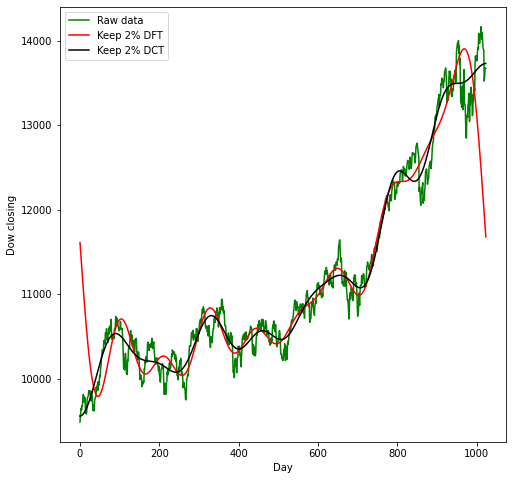

In [71]:
# 7.6 using same method as above, lnow use dcst

import urllib3
from numpy import arange,array,append,argmax
from numpy.fft import rfft,irfft
from matplotlib.pyplot import plot,show,xlim,xlabel,ylabel,figure,legend

url="http://www-personal.umich.edu/~mejn/cp/data/dow2.txt"

http = urllib3.PoolManager()

response = http.request('GET', url)
data = response.data.decode('utf-8')


string=""
values=array([],float)

for i in range(len(data)):
  if (data[i] == "\n"):
    if (string != ""): values = append(values,float(string))
    string=""
  else:
    string = string + data[i]

print("Read in",len(values),"rows of data")

figure(figsize=[8,8])
plot(values,'g',label="Raw data")
xlabel("Day")
ylabel("Dow closing")

# Now calculate Fourier transform and dct
c = rfft(values)
d = dct(values)

cutoff2 = 0.02

# now do the inverse and apply cutoffs. This allows us to discard the small-level detail. 
# the cut-off scale determines how much the curve is smoothed out
n = int(cutoff2*len(c)) #how many to keep
c[n:] = 0.0
z = irfft(c)
plot(z,"r-",label="Keep 2% DFT")

#DCT looks MUCH better!
n = int(cutoff2*len(d)) 
d[n:] = 0.0
z = idct(d)
plot(z,"k-",label="Keep 2% DCT")

legend()
show()

In [2]:
#7.9 code just to read things in! to be used with the below
from numpy import arange,array,append,argmax,vstack

url = "http://www-personal.umich.edu/~mejn/cp/data/blur.txt"

import urllib3

http = urllib3.PoolManager()

response = http.request('GET', url)
data = response.data.decode('utf-8')

string=""
values=array([],float)
print("length of original data = ",len(data))
row=array([],float)
for i in range(len(data)):
  if (data[i] == "\n"):
    ### add the last one
    row = append(row,float(string))
    string=""
    if (len(values) > 0):
      values = vstack((values,row)) ## append row to the end
    else: 
      values = row
    row=array([],float) # clear the row
    string="" # clear the string
  elif (data[i] == " "): # if a space, add this new number
    row = append(row,float(string))
    string=""
  else: #still on the same number
   string = string + data[i]

print("Length of the new data = ",len(values))



length of original data =  10370223
Length of the new data =  1024


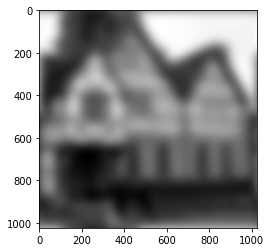

In [8]:
# this plots things after the above reads in the data
from matplotlib.pyplot import plot,show,xlim,xlabel,ylabel,figure,legend,imshow,gray,hot

imshow(values)
gray()
show()



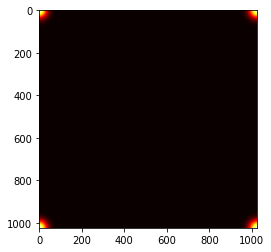

In [9]:
## Now the point spread function
from numpy import empty,exp
rows = values.shape[0]
cols = values.shape[1]

sigma = 25

f = empty([rows,cols],float)
for j in range(cols):
  jp = j
  if jp > cols/2:
    jp -= cols
  for i in range(rows):
    ip = i
    if ip > rows / 2:
      ip -= rows
    f[i,j] = exp(-(ip*ip+jp*jp)/(2*sigma*sigma))

hot()
imshow(f)
show()

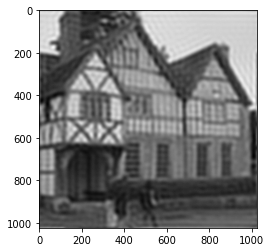

In [13]:
# now try the deblurring
from numpy.fft import irfft2,rfft2
xfft = rfft2(values)
ffft = rfft2(f)

# Divide one by the other
yfft = empty([rows,cols//2+1],complex)
for j in range(cols//2+1):
  for i in range(rows):
    yfft[i,j] = xfft[i,j]/max(ffft[i,j],1e-3)

# Invert
y = irfft2(yfft)
gray()
imshow(y)
show()